In [1]:
# Data Analysis Bee & Drone

In [2]:
import librosa
import glob
import numpy as np
import pandas as pd
import mglearn

In [3]:
# Set the path
path ='/Users/junhyuckwoo/capstone/TestFile/Data/'
bee_path = path + 'bee/426547__breyenkatz__bee-hive-and-swarm.wav'
drone_path = path + 'phantom4/base/5feet_b.wav'

In [4]:
# Load data
raw_bee, sr_bee = librosa.load(bee_path, sr=44100)
raw_drone, sr_drone = librosa.load(drone_path, sr=44100)

In [5]:
# Split data as long as we want
length = 44100
bee = raw_bee[:length]
drone = raw_drone[:length]

# Check data length
print("bee: ", len(bee))
print("drone: ",len(drone))

bee:  44100
drone:  44100


In [6]:
# Calculate MFCC
mfcc_bee = librosa.feature.mfcc(bee)
mfcc_drone = librosa.feature.mfcc(drone)

In [11]:
# Input data
mfcc_bee_t= mfcc_bee.T
mfcc_drone_t=mfcc_drone.T
x = np.concatenate((mfcc_bee_t, mfcc_drone_t))
print("Bee: ", mfcc_bee_t.shape)
print("Drone: ", mfcc_drone_t.shape)
print("Input: ", x.shape)

Bee:  (87, 20)
Drone:  (87, 20)
Input:  (174, 20)


In [12]:
# Label data
y1 = np.zeros(87)
y2 = np.ones(87)
y = np.concatenate((y1,  y2))
print("L-Bee: ", y1.shape)
print("L-Drone: ", y2.shape)
print("y: ", y.shape)

L-Bee:  (87,)
L-Drone:  (87,)
y:  (174,)


In [13]:
iris_dataframe = pd.DataFrame(x)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124356940>,
      dtype=object)

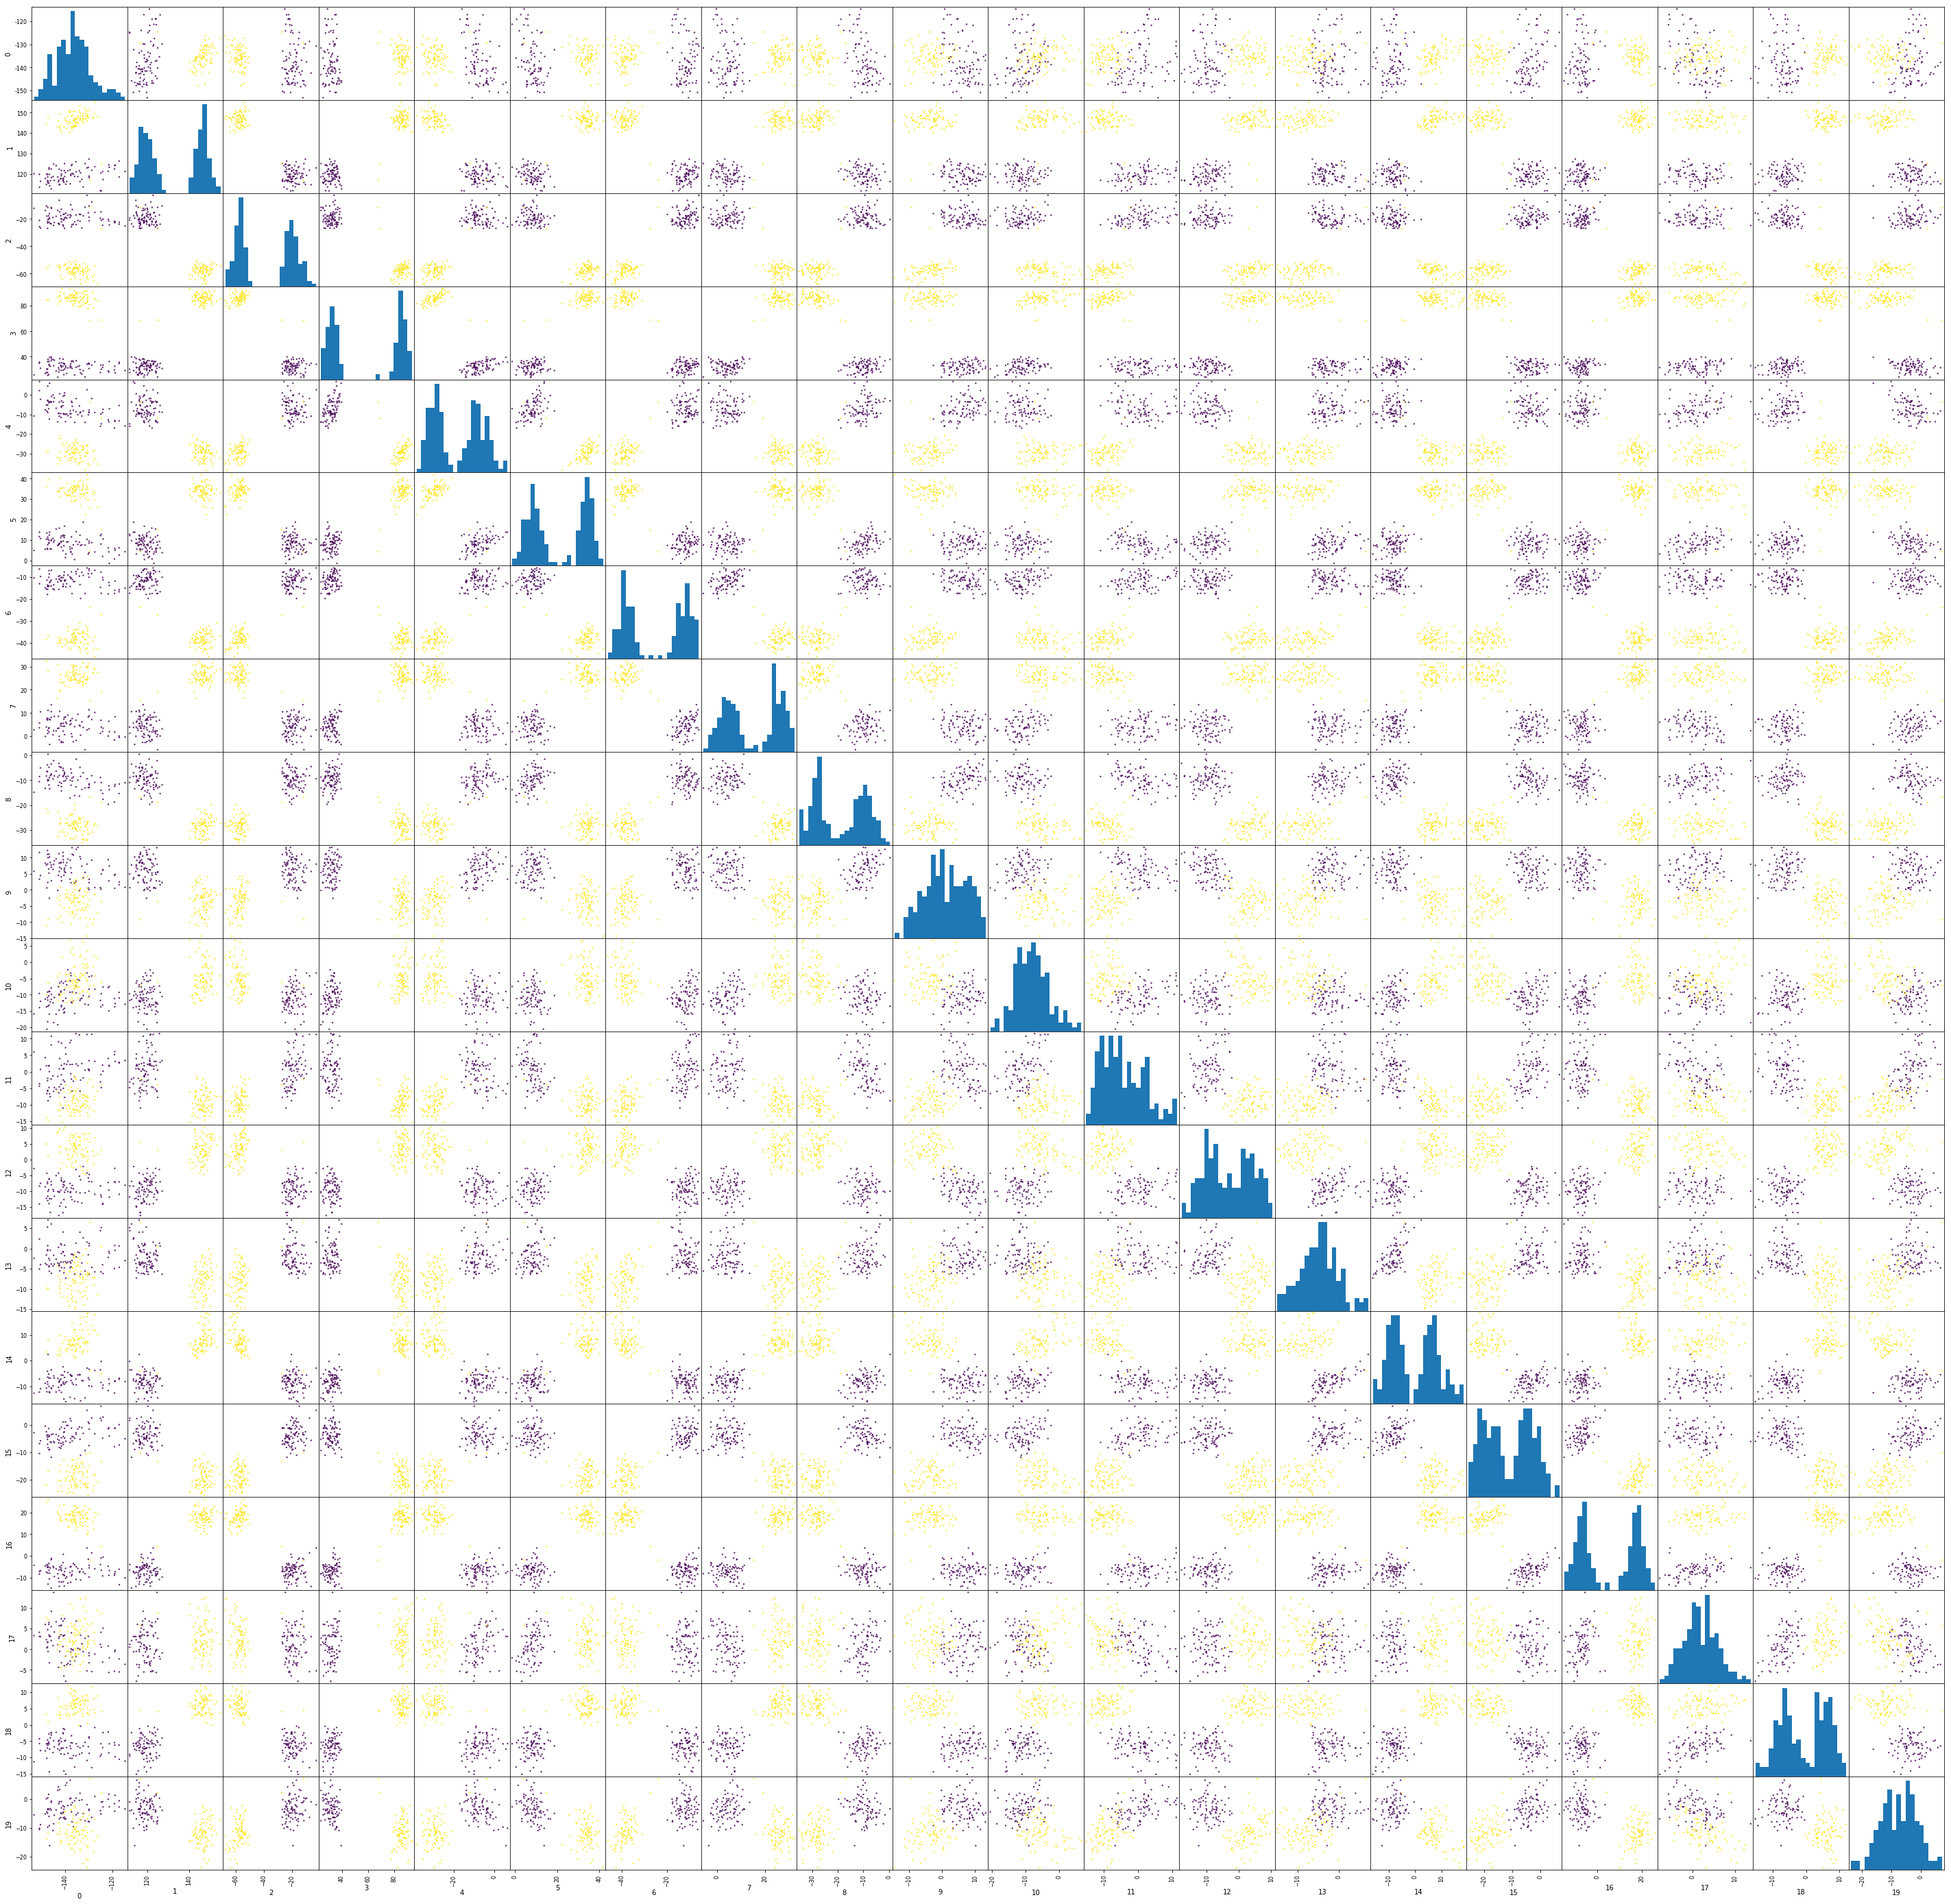

In [14]:
pd.plotting.scatter_matrix(iris_dataframe, c=y, figsize=(50,50), marker='o', hist_kwds={'bins': 20}, s=6, alpha=.8)